# Install All Libs

In [7]:
pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 76.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 72.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install statsmodels

  Using cached statsmodels-0.14.4-cp310-cp310-macosx_11_0_arm64.whl.metadata (9.2 kB)
  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
Using cached statsmodels-0.14.4-cp310-cp310-macosx_11_0_arm64.whl (9.9 MB)
Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)
Note: you may need to restart the kernel to use updated packages.


# Import

## import default

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## Import SKLearn

In [15]:
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [16]:
# Cross-Validation models.
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz

In [17]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# Import Dataset

In [20]:
insurance_dataset = pd.read_csv('./data/insurance_example.csv', decimal='.', sep=',')

# Visualização de dados(inicial)

## View Básica
- view dataset (head)
- view qtd. Rows and Coolumns

In [27]:
# View Dataset
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [30]:
# View Qtd. Rows and Columns
insurance_dataset.shape

print(f'esse dataset tem {insurance_dataset.shape[0]} linhas e {insurance_dataset.shape[1]} colunas')

esse dataset tem 1338 linhas e 7 colunas


In [32]:
# About data
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [33]:
#about exist null
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [35]:
#Statistics Basic Info 
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [40]:
# view dupliacted rows
insurance_dataset.duplicated().sum()

1

In [43]:
#existe uma linha duplicada
linhas_duplicadas = insurance_dataset[insurance_dataset.duplicated(keep=False)]

# Exibir as linhas duplicadas(dados iguais)
print(linhas_duplicadas)

     age   sex    bmi  children smoker     region    charges
195   19  male  30.59         0     no  northwest  1639.5631
581   19  male  30.59         0     no  northwest  1639.5631


In [44]:
#Visualizar as Colunas
insurance_dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

## Descrição das Colunas
- 'age'= 
- 'sex'=
- 'bmi'=
- 'children'=
- 'smoker'=
- 'region'=
- 'charges=

In [47]:
for coluna in insurance_dataset.columns :
    print(insurance_dataset.value_counts(coluna))

age
18    69
19    68
20    29
51    29
45    29
46    29
47    29
48    29
50    29
52    29
28    28
54    28
21    28
27    28
26    28
49    28
25    28
24    28
23    28
22    28
53    28
42    27
44    27
43    27
41    27
40    27
31    27
30    27
29    27
56    26
34    26
33    26
32    26
57    26
55    26
35    25
59    25
58    25
36    25
39    25
38    25
37    25
60    23
61    23
62    23
63    23
64    22
Name: count, dtype: int64
sex
male      676
female    662
Name: count, dtype: int64
bmi
32.300    13
28.310     9
30.875     8
31.350     8
28.880     8
          ..
28.800     1
28.490     1
28.380     1
28.200     1
53.130     1
Name: count, Length: 548, dtype: int64
children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64
region
southeast    364
northwest    325
southwest    325
northeast    324
Name: count, dtype: int64
charges
1639.56310     2
12741.16745    1
12949.15540   

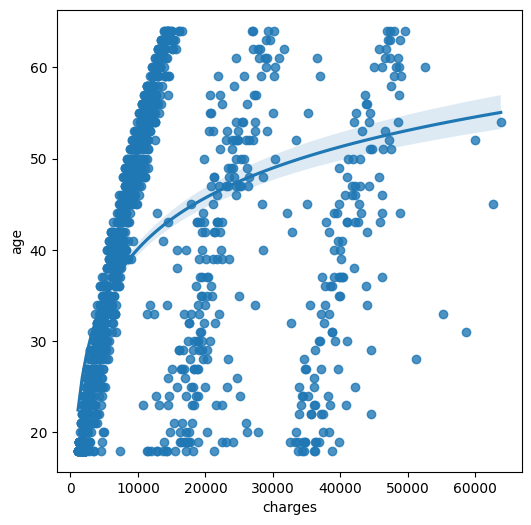

In [49]:
plt.figure(figsize=(6,6))
sns.regplot(data=insurance_dataset, x="charges", y="age", logx=True)
plt.show()